In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

# reflect the tables
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [6]:
# View all of the classes that automap found
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [7]:
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [8]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
last_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
last_date


('2017-08-23')

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_twelve = dt.date(2017, 8, 23) - dt.timedelta(days=365)
last_twelve

datetime.date(2016, 8, 23)

In [14]:
# Retrieve the last 12 months of precipitation data
# Perform a query to retrieve the data and precipitation scores
prec_data = session.query(Measurements.date,Measurements.prcp).\
            filter(Measurements.date > last_twelve).\
            order_by(Measurements.date).all()
prec_data

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [42]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
prec_df = pd.DataFrame(prec_data, columns=['Date', 'Precip'])
prec_df.set_index('Date', inplace=True)
prec_df.head()

,Precip
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


<function matplotlib.pyplot.show(close=None, block=None)>

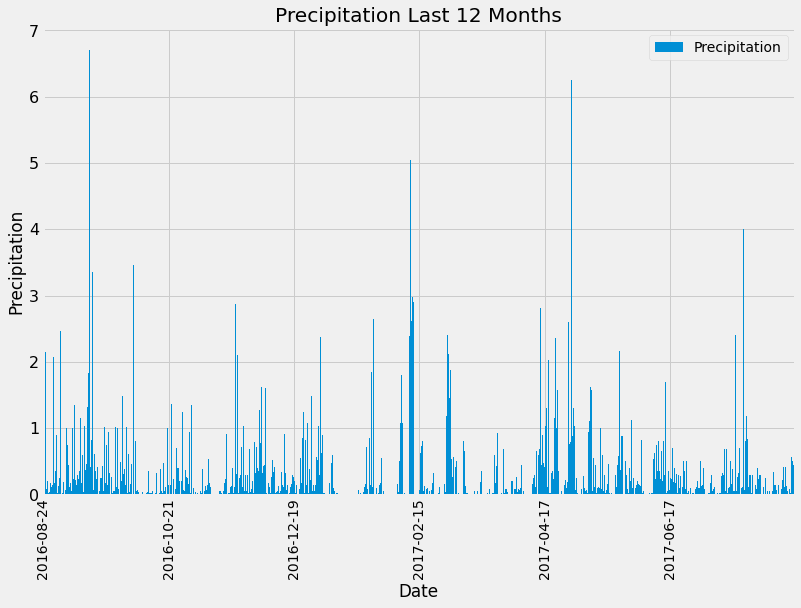

In [22]:
# Use Pandas Plotting with Matplotlib to plot the data
# Plot the precipitation for the past 12 months
percbar = prec_df.plot(kind='bar', width=3, figsize=(12,8))
plt.locator_params(axis='x', nbins=6)
percbar.tick_params(axis='y', labelsize=16)
percbar.grid(True)
plt.title("Precipitation Last 12 Months")
plt.ylabel("Precipitation")
plt.xlabel("Date")
plt.show

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [25]:
# Design a query to calculate the total number stations in the dataset
session.query(Stations.id).count()

9

In [31]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurements.station, func.count(Measurements.station)).\
            group_by(Measurements.station).\
            order_by(func.count(Measurements.station).desc()).all()

most_active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_data = most_active_stations [0][0]
session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
                filter(Measurements.station == most_active).all()


[(54.0, 71.66378066378067, 85.0)]

In [37]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_results = session.query(Measurements.station, Measurements.tobs).\
                filter(Measurements.station == station_data).\
                filter(Measurements.date >= last_twelve).all()
tempob = pd.DataFrame(temp_results)
tempob.set_index('station', inplace=True)
tempob.head()


,tobs
station,
USC00519281,77.0
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0


<function matplotlib.pyplot.show(close=None, block=None)>

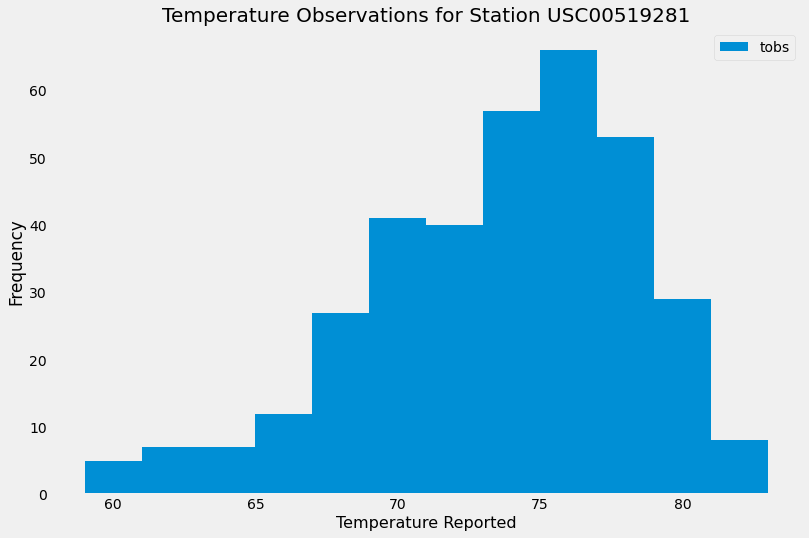

In [41]:
tempob.plot.hist(by='station', bins=12, figsize=(12,8))
plt.grid()
plt.title("Temperature Observations for Station " + station_data, fontsize=20)
plt.xlabel("Temperature ", fontsize=16)
plt.show

# Close session

In [ ]:
# Close Session
session.close()